In [7]:
api_key='37269137-5b52-4fc1-ba29-ea3d13abfe48'
device_id='BOLT5871034'

Reading sensor value
Sensor value is 1024


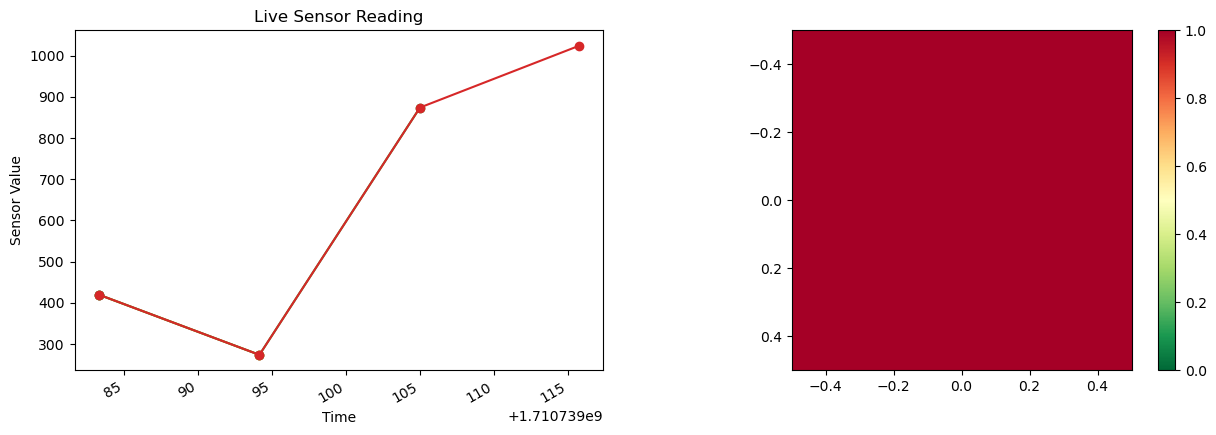

Stopped by the user
[420, 274, 874, 1024]


In [11]:
#right code

import time
import json
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, clear_output
from boltiot import Bolt




mybolt = Bolt(api_key, device_id)


sensor_values = []
timestamps = []


plt.figure(figsize=(15, 5))


plt.subplot(1, 2, 1)
plt.title("Live Sensor Reading")
plt.xlabel("Time")
plt.ylabel("Sensor Value")


plt.subplot(1, 2, 2)
plt.title("Pressure Distribution Heatmap")
plt.xlabel("X")
plt.ylabel("Y")

try:
    while True:
        print("Reading sensor value")
        response = mybolt.analogRead('A0')
        data = json.loads(response)
        sensor_value = int(data['value'])
        print("Sensor value is", sensor_value)

       
        sensor_values.append(sensor_value)
        timestamps.append(time.time())

       
        plt.subplot(1, 2, 1)
        plt.plot(timestamps, sensor_values, marker='o')
        plt.gcf().autofmt_xdate()

        
        normalized_pressure = (sensor_value - 0) / (1024 - 0)

       
        heatmap_data =np.array([[normalized_pressure]])
        plt.subplot(1, 2, 2)
        plt.imshow(heatmap_data, cmap='RdYlGn_r', interpolation='nearest', vmin=0, vmax=1)
        plt.colorbar()

        
        display(plt.gcf())

    
        time.sleep(10) 
        clear_output(wait=True)  
except KeyboardInterrupt:
    print("Stopped by the user")


plt.close()
print(sensor_values)


